In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


# 1-import library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import tensorflow as tf
import keras

2025-06-23 14:31:03.763962: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750689064.050342      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750689064.132186      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 2-EDA

In [5]:
data=pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")

In [6]:
data.head(2)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [7]:
data=data.drop(columns=["2401","Borderlands"])

In [8]:
data.columns

Index(['Positive', 'im getting on borderlands and i will murder you all ,'], dtype='object')

In [9]:
data=data.rename(columns={"Positive":"label"})

In [10]:
data=data.rename(columns={"im getting on borderlands and i will murder you all ,":"text"})

In [11]:
data.head(2)

,label,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...


In [12]:
data["label"].value_counts()

label
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Positive', 'Negative', 'Neutral', 'Irrelevant']])
data['label'] = oe.fit_transform(data[['label']])


In [14]:
data['label']=data['label'].astype('int32')

In [15]:
data

,label,text
0,0,I am coming to the borders and I will kill you...
1,0,im getting on borderlands and i will kill you ...
2,0,im coming on borderlands and i will murder you...
3,0,im getting on borderlands 2 and i will murder ...
4,0,im getting into borderlands and i can murder y...
...,...,...
74676,0,Just realized that the Windows partition of my...
74677,0,Just realized that my Mac window partition is ...
74678,0,Just realized the windows partition of my Mac ...
74679,0,Just realized between the windows partition of...


In [16]:
data['label'].value_counts()

label
1    22542
0    20831
2    18318
3    12990
Name: count, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   74681 non-null  int32 
 1   text    73995 non-null  object
dtypes: int32(1), object(1)
memory usage: 875.3+ KB


In [18]:
data.describe()

,label
count,74681.000000
mean,1.314230
std,1.058891
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [19]:
data['text']

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: text, Length: 74681, dtype: object

In [46]:
data.isnull().sum()

label      0
text     686
dtype: int64

In [47]:
data.dropna()

,label,text
0,0,I am coming to the borders and I will kill you...
1,0,im getting on borderlands and i will kill you ...
2,0,im coming on borderlands and i will murder you...
3,0,im getting on borderlands 2 and i will murder ...
4,0,im getting into borderlands and i can murder y...
...,...,...
74676,0,Just realized that the Windows partition of my...
74677,0,Just realized that my Mac window partition is ...
74678,0,Just realized the windows partition of my Mac ...
74679,0,Just realized between the windows partition of...


In [56]:
data.duplicated().sum()

4909

In [58]:
data.drop_duplicates()

,label,text
0,0,I am coming to the borders and I will kill you...
1,0,im getting on borderlands and i will kill you ...
2,0,im coming on borderlands and i will murder you...
3,0,im getting on borderlands 2 and i will murder ...
4,0,im getting into borderlands and i can murder y...
...,...,...
74676,0,Just realized that the Windows partition of my...
74677,0,Just realized that my Mac window partition is ...
74678,0,Just realized the windows partition of my Mac ...
74679,0,Just realized between the windows partition of...


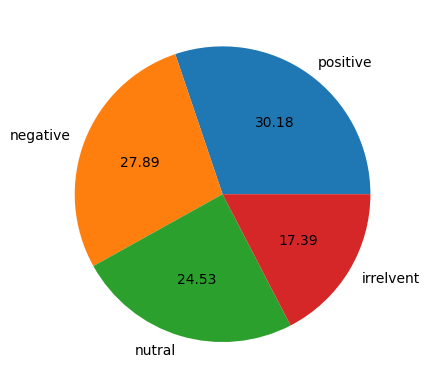

In [59]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=['positive','negative' ,'nutral' ,'irrelvent'],autopct="%0.2f")
plt.show()

## 3-data preprocess

In [60]:
import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
ps=PorterStemmer()


In [61]:
def preprocess_data(text):
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
    
        

In [64]:
data['transformed_text'] = data['text'].astype('str').apply(preprocess_data)

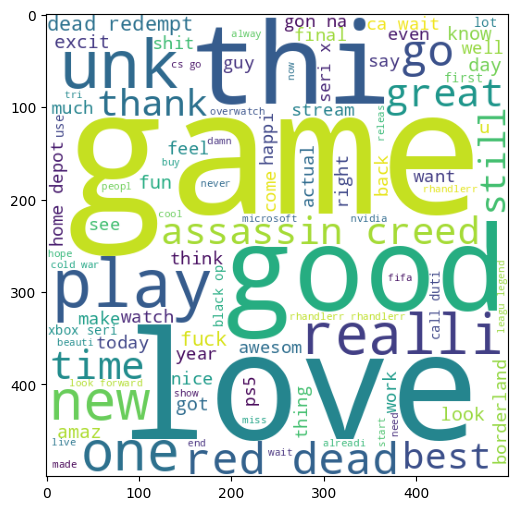

In [65]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(data[data['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

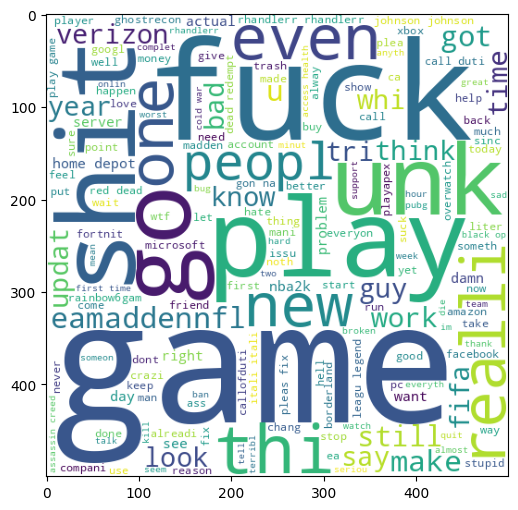

In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(data[data['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

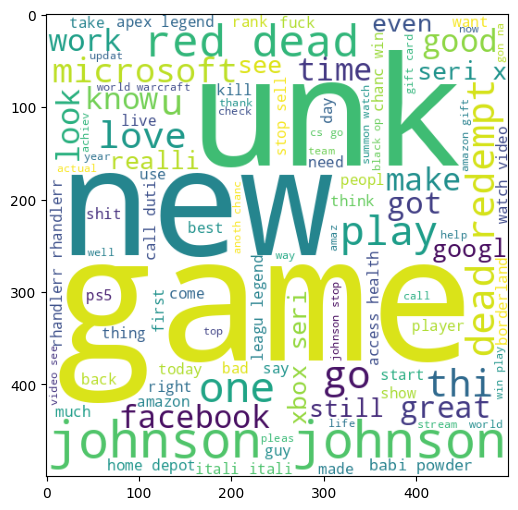

In [67]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(data[data['label'] == 2]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

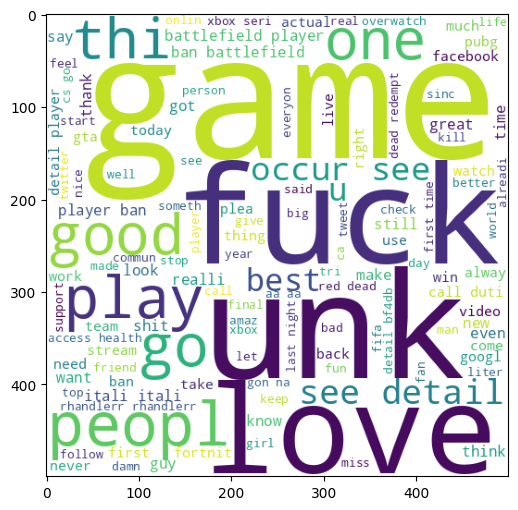

In [68]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

spam_wc = wc.generate(data[data['label'] == 3]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

# 4 - model training

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [ ]:
X.shape

In [ ]:
y = data['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df